In [14]:
from util.read_keys import read_usr, read_pwd

In [15]:
key_path = './config/keys.json'

In [16]:
usr = read_usr(key_path)
pwd = read_pwd(key_path)

In [17]:
from arcgis.gis import GIS
from IPython.display import display

In [18]:
gis = GIS("https://www.arcgis.com", username=usr, password=pwd)

<Item title:"Accessibility Data-Copy" type:Web Map owner:DCHEN_LCOG>
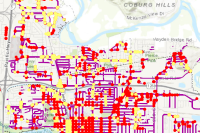

In [26]:
# Search for 'USA major cities' feature layer collection
search_results = gis.content.search('Accessibility Data-Copy',
                                    'Web Map')

# Access the first Item that's returned
accessibility = search_results[0]

accessibility

In [28]:
type(accessibility)

arcgis.gis.Item

In [30]:
from arcgis.mapping import WebMap

In [31]:
empty_webmap = WebMap()

In [32]:
empty_webmap.layers

[]

In [33]:
accessibility_map = WebMap(accessibility)

In [34]:
for layer in accessibility_map.layers:
    print(layer.title)

WPRD_Official_Trails
ADA Tactile Warning Plate
Curb Ramps
Sidewalk


In [35]:
accessibility_map.basemap

{
  "baseMapLayers": [
    {
      "id": "defaultBasemap",
      "layerType": "ArcGISTiledMapServiceLayer",
      "url": "https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer",
      "visibility": true,
      "opacity": 1,
      "title": "Topographic"
    }
  ],
  "title": "Topographic"
}

In [36]:
accessibility_map.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [37]:
dict(accessibility_map.definition).keys()

dict_keys(['operationalLayers', 'baseMap', 'spatialReference', 'authoringApp', 'authoringAppVersion', 'version', 'applicationProperties'])

In [19]:
from arcgis.features import FeatureLayer

In [20]:
lyr_url = 'https://services6.arcgis.com/5YJfprDR6T2FT4tY/arcgis/rest/services/Sidewalk/FeatureServer/2'

layer = FeatureLayer(lyr_url)
layer

<FeatureLayer url:"https://services6.arcgis.com/5YJfprDR6T2FT4tY/arcgis/rest/services/Sidewalk/FeatureServer/2">

In [29]:
type(layer)

arcgis.features.layer.FeatureLayer

In [8]:
layer.properties.extent

{
  "xmin": 4251132.198643046,
  "ymin": 869555.5751312346,
  "xmax": 4293984.088406833,
  "ymax": 894352.3690944874,
  "spatialReference": {
    "wkt": "PROJCS[\"NAD_1983_StatePlane_Oregon_South_FIPS_3602_Feet_Intl\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID[\"GRS_1980\",6378137.0,298.257222101]],PRIMEM[\"Greenwich\",0.0],UNIT[\"Degree\",0.0174532925199433]],PROJECTION[\"Lambert_Conformal_Conic\"],PARAMETER[\"False_Easting\",4921259.843],PARAMETER[\"False_Northing\",0.0],PARAMETER[\"Central_Meridian\",-120.5],PARAMETER[\"Standard_Parallel_1\",42.33333333333333],PARAMETER[\"Standard_Parallel_2\",44.0],PARAMETER[\"Latitude_Of_Origin\",41.66666666666666],UNIT[\"Foot\",0.3048]]"
  }
}

In [9]:
for f in layer.properties.fields:
    print(f['name'])

OBJECTID_1
OBJECTID
DIS
FIRST_Side
LAST_Sidew
SHAPE_Leng
GlobalID
Shape__Length


In [65]:
import arcpy

In [67]:
import os

In [66]:
outpath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\PerformanceAnalysis'

item = gis.content.get('a12ed223723e432bbe70d842e93d4acc')
item_shp = item.export(title='sidewalks_SPR', export_format='Shapefile')

arcpy.conversion.FeatureClassToShapefile(layer, outpath)

In [ ]:
import urllib, json
import requests

In [50]:
from urllib.request import urlopen

In [59]:
json_url = 'https://services6.arcgis.com/5YJfprDR6T2FT4tY/arcgis/rest/services/Sidewalk/FeatureServer/2?f=pjson'

In [60]:
response = urlopen(json_url)
myJSON = response.read()

In [61]:
foo = open("jsonOutput.json", "wb")
foo.write(myJSON);
foo.close()

arcpy.JSONToFeatures_conversion("jsonOutput.json", os.path.join(outpath, "sidewalks_SPR.shp"))